In [ ]:
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle


In [ ]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [ ]:
data = data.sample(frac=1)
data = data[:200000]

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [ ]:
data.head(5)

,polarity,id,date,query,user,text
728820,0,2263167417,Sun Jun 21 00:07:00 PDT 2009,NO_QUERY,ak618,@tina_murphy well then zito is going to be a l...
1406870,4,2055418139,Sat Jun 06 09:16:44 PDT 2009,NO_QUERY,sammi_x,@mallverine .. quite easy though .. just one ...
441916,0,2067138569,Sun Jun 07 11:49:02 PDT 2009,NO_QUERY,jenkersey,Driving out to Steven's Pass. It's cloudy so t...
1428855,4,2059633736,Sat Jun 06 17:19:33 PDT 2009,NO_QUERY,audiencealldead,Bring on the harleys for ohio bike week.
163163,0,1957715674,Fri May 29 01:22:36 PDT 2009,NO_QUERY,in_the_air,"@JulieAdore I checked ULCA, they've got a prog..."


In [ ]:
data['polarity'].unique()

array([0, 4])

In [ ]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
728820,0,2263167417,Sun Jun 21 00:07:00 PDT 2009,NO_QUERY,ak618,@tina_murphy well then zito is going to be a l...
1406870,1,2055418139,Sat Jun 06 09:16:44 PDT 2009,NO_QUERY,sammi_x,@mallverine .. quite easy though .. just one ...
441916,0,2067138569,Sun Jun 07 11:49:02 PDT 2009,NO_QUERY,jenkersey,Driving out to Steven's Pass. It's cloudy so t...
1428855,1,2059633736,Sat Jun 06 17:19:33 PDT 2009,NO_QUERY,audiencealldead,Bring on the harleys for ohio bike week.
163163,0,1957715674,Fri May 29 01:22:36 PDT 2009,NO_QUERY,in_the_air,"@JulieAdore I checked ULCA, they've got a prog..."


In [ ]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.499820,1.999077e+09
std,0.500001,1.933482e+08
min,0.000000,1.467811e+09
25%,0.000000,1.957079e+09
50%,0.000000,2.002065e+09
75%,1.000000,2.177003e+09
max,1.000000,2.329199e+09


In [ ]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99964
No. of negative tagged sentences is: 100036


In [ ]:
# get a word count per of text
def word_count(words):
    return len(words.split())

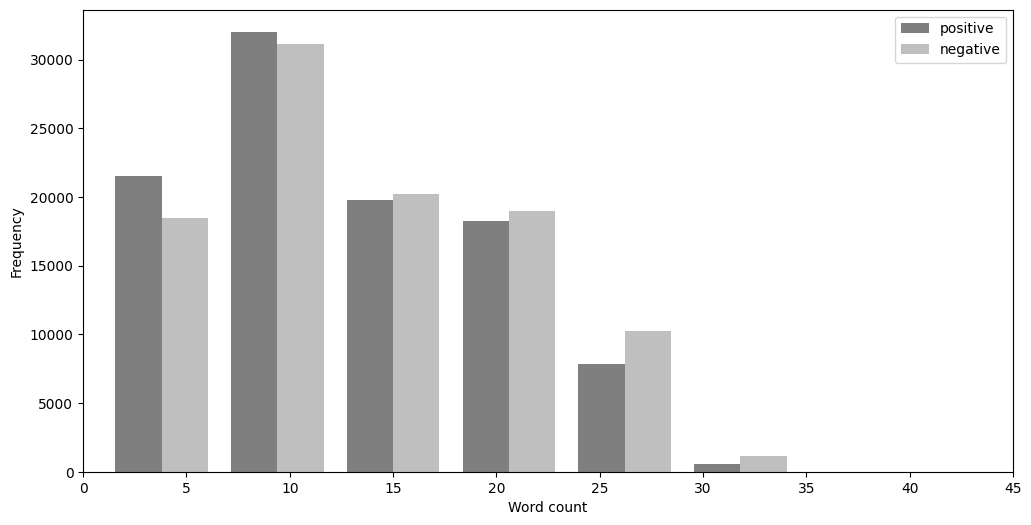

In [ ]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['black','grey'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [ ]:
#converting pandas object to a string type
data['text'] = data['text'].astype('str')

In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'should', 'shan', 'own', "you're", 'about', 'in', 'herself', 'did', 'hadn', "you'll", 'can', 'had', 'weren', 'he', 'any', 'all', 'where', 'didn', 'won', 'over', "should've", 'the', 'o', 'at', 'between', "wouldn't", 'an', 'ain', "weren't", 'as', 'mustn', "wasn't", 'yourself', 'only', 'isn', 're', 'few', 've', 'him', 'ourselves', 'such', 'mightn', 'it', 'll', "haven't", 'by', 'itself', 'are', 'not', "didn't", "shouldn't", 'above', 'those', 'here', 'same', 'she', 'myself', 'there', "doesn't", 'just', 'am', 'up', 'which', 'be', 'you', 'their', 'wouldn', 'hasn', 'these', 'through', 'wasn', 'more', 'shouldn', 'is', 'your', 'than', 'out', 'our', 'again', 'd', "shan't", 'why', 'how', 'other', 'haven', 'yourselves', 'down', 'will', 'ours', 'ma', 'into', 't', 'himself', "you'd", 'having', 'so', 'couldn', 'then', 'but', 'until', 'because', 'below', 'from', 'each', "aren't", 'doesn', 'its', 'were', "couldn't", 'on', "mustn't", "hadn't", 'they', 'of', 'needn', 'nor', "it's", 'i', 'after', 'most', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Data Preprocessing

The Preprocessing steps taken are:

Lower Casing: Each text is converted to lowercase.
Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

Removing Short Words: Words with length less than 2 are removed.

Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
data.head(10)

,polarity,id,date,query,user,text,word count,processed_tweets
728820,0,2263167417,Sun Jun 21 00:07:00 PDT 2009,NO_QUERY,ak618,@tina_murphy well then zito is going to be a l...,24,tinamurphy well zito going lost cause die alon...
1406870,1,2055418139,Sat Jun 06 09:16:44 PDT 2009,NO_QUERY,sammi_x,@mallverine .. quite easy though .. just one ...,16,mallverine quite easy though one day il ok tha...
441916,0,2067138569,Sun Jun 07 11:49:02 PDT 2009,NO_QUERY,jenkersey,Driving out to Steven's Pass. It's cloudy so t...,12,riving stevens pas cloudy convertible seems po...
1428855,1,2059633736,Sat Jun 06 17:19:33 PDT 2009,NO_QUERY,audiencealldead,Bring on the harleys for ohio bike week.,8,ring harleys ohio bike week
163163,0,1957715674,Fri May 29 01:22:36 PDT 2009,NO_QUERY,in_the_air,"@JulieAdore I checked ULCA, they've got a prog...",17,julieadore checked ulca theyve got program pro...
1128868,1,1975425768,Sat May 30 15:07:51 PDT 2009,NO_QUERY,lucasstarr,Leave it up to Sherwood to say that Terminator...,14,eave sherwood say terminator sucked never trus...
21989,0,1557391102,Sun Apr 19 03:49:40 PDT 2009,NO_QUERY,joseio,is trying to stay awake after being up all nig...,12,trying stay awake night feeling ill
1599063,1,2193343492,Tue Jun 16 08:19:46 PDT 2009,NO_QUERY,amyiscrazeeyh,will be officially out of high school at 2:30p...,10,ill officially high school 230pm tomorrow
932281,1,1771057545,Mon May 11 23:03:40 PDT 2009,NO_QUERY,tonchyZ,Buenos dï¿½as. Cï¿½mo estï¿½s? It is a beautif...,19,uenos dï¿½as cï¿½mo estï¿½s beautiful sunny mo...
399346,0,2057128564,Sat Jun 06 12:25:32 PDT 2009,NO_QUERY,lauraEchilds,@mrhankmanthe3rd,1,mrhankmanthe3rd


**Vectorization and Splitting the data**

Storing input variable-processes_tweets to X and output variable-polarity to y

In [ ]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [ ]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


Convert text to word frequency vectors

TF-IDF

This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.

Inverse Document Frequency: This downscales words that appear a lot across documents.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170482)
y_train (160000,)

X_test (40000, 170482)
y_test (40000,)


**Model Building**

In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Random Forest**

Accuracy of model on training data : 75.84625
Accuracy of model on testing data : 71.17750000000001 

              precision    recall  f1-score   support

           0       0.74      0.64      0.69     19892
           1       0.69      0.78      0.73     20108

    accuracy                           0.71     40000
   macro avg       0.72      0.71      0.71     40000
weighted avg       0.72      0.71      0.71     40000



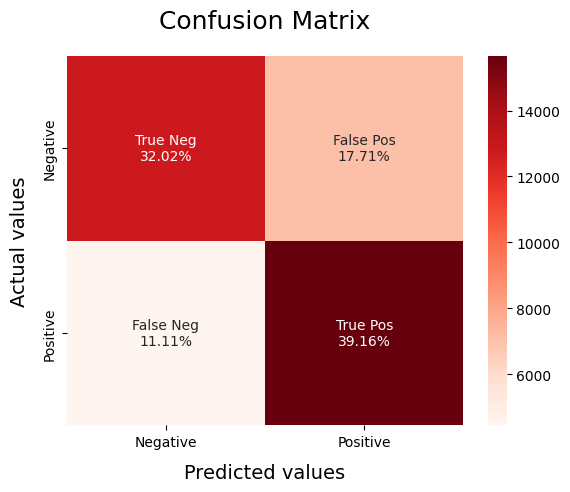

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

**SVM**

Accuracy of model on training data : 93.095
Accuracy of model on testing data : 75.85499999999999 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     19892
           1       0.75      0.78      0.76     20108

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



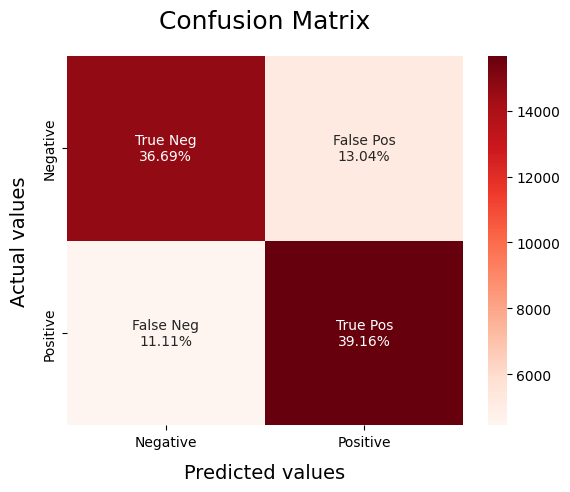

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)